# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from IPython.display import HTML
from scipy import linalg as la

In [2]:
%matplotlib notebook
%matplotlib inline

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

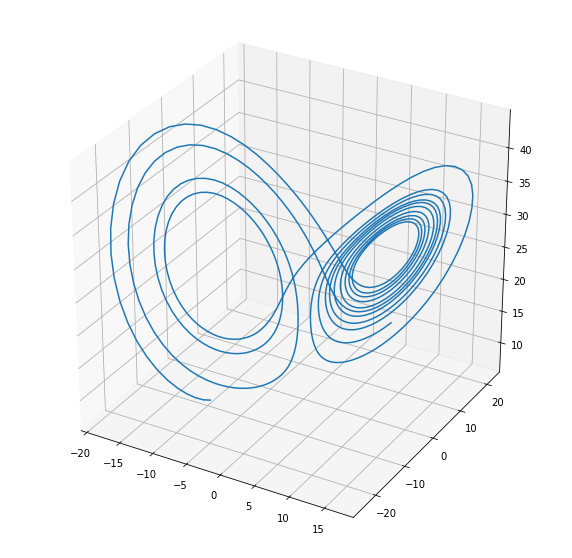

In [66]:
 # Initialize parameters
sigma = 10
rho = 28
beta = 8/3

def lorenz(t,y):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    # Define the ODE
    X = y[0]
    Y = y[1]
    Z = y[2]
    return np.array([sigma*(Y-X), rho*X - Y - X*Z, X*Y - beta*Z])

# Time domain
t = np.linspace(0,10,1000)

# Initial conditions
y0 = np.array([np.random.uniform(-15,15), np.random.uniform(-15,15), np.random.uniform(-15,15)])

# Solve the system
sol = solve_ivp(lorenz, (0,10), y0, t_eval=t)

# Plot the solution on 3D plot
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, projection='3d')  
ax1.plot(sol.y[0], sol.y[1], sol.y[2])
plt.show()


## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

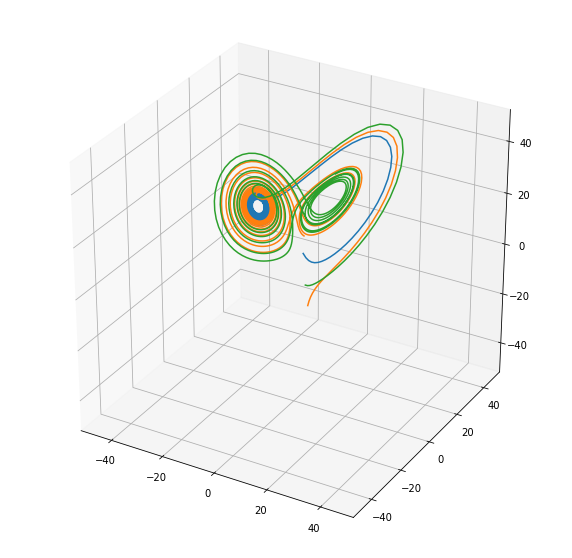

In [72]:
# Create 3 separate initial conditions
first_y0 = np.array([np.random.uniform(-15,15), np.random.uniform(-15,15), np.random.uniform(-15,15)])
second_y0 = np.array([np.random.uniform(-15,15), np.random.uniform(-15,15), np.random.uniform(-15,15)])
third_y0 = np.array([np.random.uniform(-15,15), np.random.uniform(-15,15), np.random.uniform(-15,15)])

# Solve the system for different initial conditions, same t as in prob1
sol1 = solve_ivp(lorenz, (0,10), first_y0, t_eval=t)
sol2 = solve_ivp(lorenz, (0,10), second_y0, t_eval=t)
sol3 = solve_ivp(lorenz, (0,10), third_y0, t_eval=t)

# Plot the solution on 3D plot
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, projection='3d') 
ax1.set_xlim((-50,50))
ax1.set_ylim((-50,50))
ax1.set_zlim((-50,50))
ax1.plot(sol1.y[0], sol1.y[1], sol1.y[2])
ax1.plot(sol2.y[0], sol2.y[1], sol2.y[2])
ax1.plot(sol3.y[0], sol3.y[1], sol3.y[2])

plt.show() 

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [60]:
# Initial conditions
perturbation = np.random.randn(3)*(1e-5)
first_y0 = np.random.uniform(-15,15,3)
second_y0 = first_y0 + perturbation

# Time domain
t = np.linspace(0,100,1000)

# Configure the plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-50,50))
ax.set_ylim((-50,50))
ax.set_zlim((-50,50))
particle1, = plt.plot([],[],[], marker='o', color='red')
traj1, = plt.plot([],[],[], color='red', alpha=0.5)
particle2, = plt.plot([],[],[], marker='o', color='blue')
traj2, = plt.plot([],[],[], color='blue', alpha=0.5)

sol1 = solve_ivp(lorenz, (0,100), first_y0, t_eval=t)
sol2 = solve_ivp(lorenz, (0,100), second_y0, t_eval=t)

# Define the update functions 
def update(i):
    particle1.set_data(sol1.y[0][i],sol1.y[1][i])
    particle1.set_3d_properties(sol1.y[2][i])
    traj1.set_data(sol1.y[0][:i+1],sol1.y[1][:i+1])
    traj1.set_3d_properties(sol1.y[2][:i+1])
    
    particle2.set_data(sol2.y[0][i],sol2.y[1][i])
    particle2.set_3d_properties(sol2.y[2][i])
    traj2.set_data(sol2.y[0][:i+1],sol2.y[1][:i+1])
    traj2.set_3d_properties(sol2.y[2][:i+1])
    return particle1,traj1,particle2,traj2

plt.close()
# Create animation, render as html5, and embed
N = range(1000)
ani = animation.FuncAnimation(fig, update, frames = N, interval=10)
HTML(ani.to_html5_video())
#ani.save('lorenz_animation1.mp4')

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [52]:
# Initial conditions
y0 = np.random.uniform(-15,15,3)

# Time domain
t = np.linspace(0,100,1000)

# Configure the plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-50,50))
ax.set_ylim((-50,50))
ax.set_zlim((-50,50))
particle1, = plt.plot([],[],[], marker='o', color='red')
traj1, = plt.plot([],[],[], color='red', alpha=0.5)
particle2, = plt.plot([],[],[], marker='o', color='blue')
traj2, = plt.plot([],[],[], color='blue', alpha=0.5)

sol1 = solve_ivp(lorenz, (0,100), y0, t_eval=t, atol=1e-15, rtol=1e-13)
sol2 = solve_ivp(lorenz, (0,100), y0, t_eval=t, atol=1e-12, rtol=1e-10)

# Define the update functions 
def update(i):
    particle1.set_data(sol1.y[0][i],sol1.y[1][i])
    particle1.set_3d_properties(sol1.y[2][i])
    traj1.set_data(sol1.y[0][:i+1],sol1.y[1][:i+1])
    traj1.set_3d_properties(sol1.y[2][:i+1])
    
    particle2.set_data(sol2.y[0][i],sol2.y[1][i])
    particle2.set_3d_properties(sol2.y[2][i])
    traj2.set_data(sol2.y[0][:i+1],sol2.y[1][:i+1])
    traj2.set_3d_properties(sol2.y[2][:i+1])
    return particle1,traj1,particle2,traj2

plt.close()
# Create animation, render as html5, and embed
N = range(1000)
ani = animation.FuncAnimation(fig, update, frames = N, interval=10)
HTML(ani.to_html5_video())
#ani.save('lorenz_animation2.mp4')

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

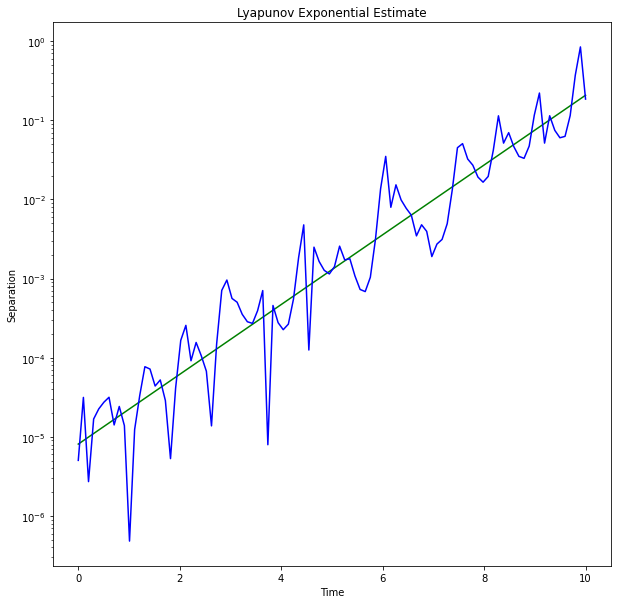

In [61]:
# Initial conditions
y0 = np.random.uniform(-15,15,3)

# Time domain
t = np.linspace(0,10,100)

# Solve system to get initial condition that lies on the attractor
sol1 = solve_ivp(lorenz, (0,10), y0, t_eval=t)
perturbation = np.random.randn(3)*(1e-5)
first_y0 = np.array([sol1.y[0][-1],sol1.y[1][-1],sol1.y[2][-1]])
second_y0 = first_y0 + perturbation

sol1 = solve_ivp(lorenz, (0,10), first_y0, t_eval=t)
sol2 = solve_ivp(lorenz, (0,10), second_y0, t_eval=t)

dt = np.abs(sol1.y[2] - sol2.y[2])
a,b = linregress(t,np.log(dt))[:2]

# Configure the plot
fig = plt.figure(figsize=(10,10))
plt.semilogy(t, np.exp(a*t+b), color='green')
plt.semilogy(t,dt, color='blue')

plt.xlabel('Time')
plt.ylabel('Separation')
plt.title('Lyapunov Exponential Estimate')

plt.show()